In [1]:
# Get time series data
import yfinance as yf
# Prophet model for time series forecast
from prophet import Prophet
# Data processing
import numpy as np
import pandas as pd
from pandas import DataFrame
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from pandas import to_datetime
from matplotlib import pyplot

Importing plotly failed. Interactive plots will not work.


In [3]:
# Data start date
start_date = '2020-01-02'
# Data end date. yfinance excludes the end date, so we need to add one day to the last day of data
end_date = '2022-11-20'

yfin = yf.Ticker('GOOG')

hist = yfin.history(period="max")

# Pull close data from Yahoo Finance for the list of tickers
ticker_list = ['GOOG']

#data = yf.download(ticker_list, start=start_date, end=end_date)[['Close']]

hist = yfin.history(period="max")
hist = hist[['Close']]
hist.index = hist.index.tz_convert(None)
hist = hist.dropna()
hist.reset_index(level=0, inplace=True)
# Change column names
hist = hist.rename({'Date': 'ds', 'Close': 'y'}, axis='columns')
# Change column names
data = hist.copy()

#data = data.reset_index()
#data.columns = ['ds', 'y']
# Take a look at the data
data.head()

,ds,y
0,2004-08-19 04:00:00,2.499133
1,2004-08-20 04:00:00,2.697639
2,2004-08-23 04:00:00,2.724787
3,2004-08-24 04:00:00,2.611960
4,2004-08-25 04:00:00,2.640104


In [4]:
# Information on the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4606 non-null   datetime64[ns]
 1   y       4606 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 72.1 KB


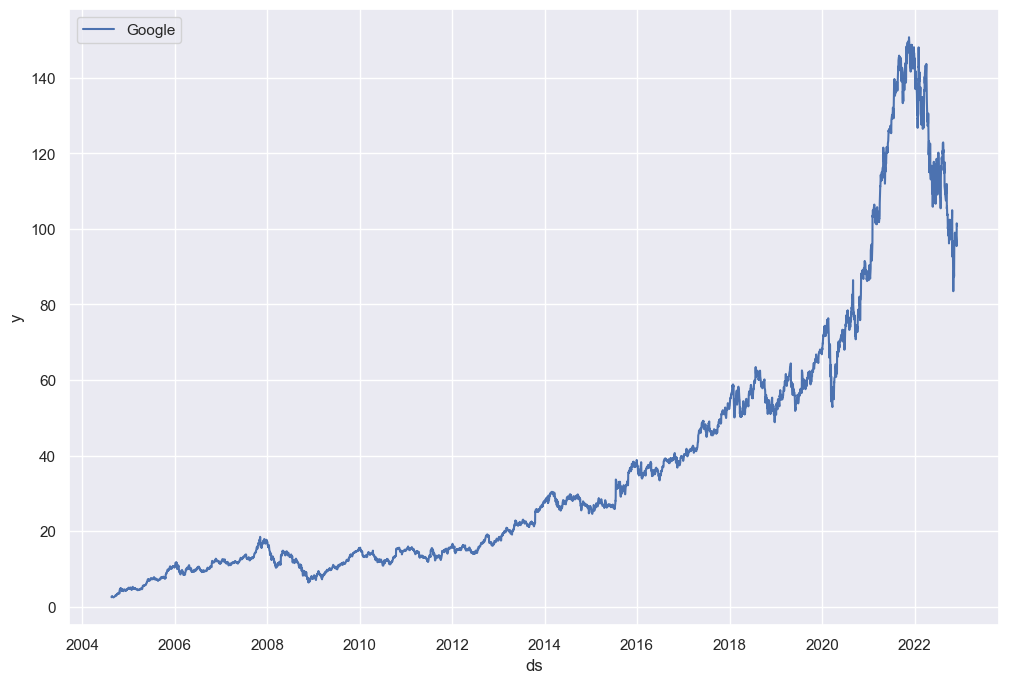

In [5]:
# Visualize data using seaborn
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data['ds'], y=data['y'])
plt.legend(['Google'])

In [7]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)


In [8]:
# Fit the model on the training dataset
#train = data.drop(data.index[-20:])

train = hist.sample(frac=0.8, random_state=0)
test_data = data.drop(train.index)
train.tail()

,ds,y
3,2004-08-24 04:00:00,2.611960
3308,2017-10-09 04:00:00,48.849998
3666,2019-03-14 04:00:00,59.277500
907,2008-03-28 04:00:00,10.911103
2662,2015-03-18 04:00:00,27.898405


In [9]:
model.fit(train)

14:34:16 - cmdstanpy - INFO - Chain [1] start processing
14:34:17 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# use the model to make a forecast
# Make prediction

future = list()
date1 = "2022-10-02"  #  start date
date2 = "2022-11-14"  #  end date
future =  pd.date_range(start=date1, periods = 365)
#future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

forecast = model.predict(hist)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-08-19 04:00:00,2.719750,-13.735425,26.980063,2.719750,2.719750,2.603014,2.603014,2.603014,-0.238469,...,1.708433,1.708433,1.708433,1.133051,1.133051,1.133051,0.0,0.0,0.0,5.322764
1,2004-08-20 04:00:00,2.728240,-17.267789,23.713378,2.728240,2.728240,2.283188,2.283188,2.283188,-0.238469,...,1.411190,1.411190,1.411190,1.110467,1.110467,1.110467,0.0,0.0,0.0,5.011428
2,2004-08-23 04:00:00,2.753709,-16.029666,26.647788,2.753709,2.753709,2.150511,2.150511,2.150511,-0.238469,...,1.370864,1.370864,1.370864,1.018116,1.018116,1.018116,0.0,0.0,0.0,4.904220
3,2004-08-24 04:00:00,2.762199,-15.629069,26.096868,2.762199,2.762199,2.312483,2.312483,2.312483,-0.238469,...,1.570739,1.570739,1.570739,0.980214,0.980214,0.980214,0.0,0.0,0.0,5.074682
4,2004-08-25 04:00:00,2.770689,-15.404504,25.863204,2.770689,2.770689,2.092939,2.092939,2.092939,-0.238469,...,1.392114,1.392114,1.392114,0.939294,0.939294,0.939294,0.0,0.0,0.0,4.863627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4601,2022-11-28 05:00:00,134.613079,115.264087,156.027683,134.613079,134.613079,1.098309,1.098309,1.098309,0.493030,...,1.477973,1.477973,1.477973,-0.872693,-0.872693,-0.872693,0.0,0.0,0.0,135.711388
4602,2022-11-29 05:00:00,134.672162,115.403379,154.323586,134.672162,134.672162,1.303325,1.303325,1.303325,0.493030,...,1.539800,1.539800,1.539800,-0.729505,-0.729505,-0.729505,0.0,0.0,0.0,135.975487
4603,2022-11-30 05:00:00,134.731245,115.333627,157.726997,134.731245,134.731245,1.309430,1.309430,1.309430,0.493030,...,1.398168,1.398168,1.398168,-0.581768,-0.581768,-0.581768,0.0,0.0,0.0,136.040674
4604,2022-12-01 05:00:00,134.790327,115.787869,156.081118,134.790327,134.790327,1.798978,1.798978,1.798978,0.493030,...,1.737374,1.737374,1.737374,-0.431426,-0.431426,-0.431426,0.0,0.0,0.0,136.589306


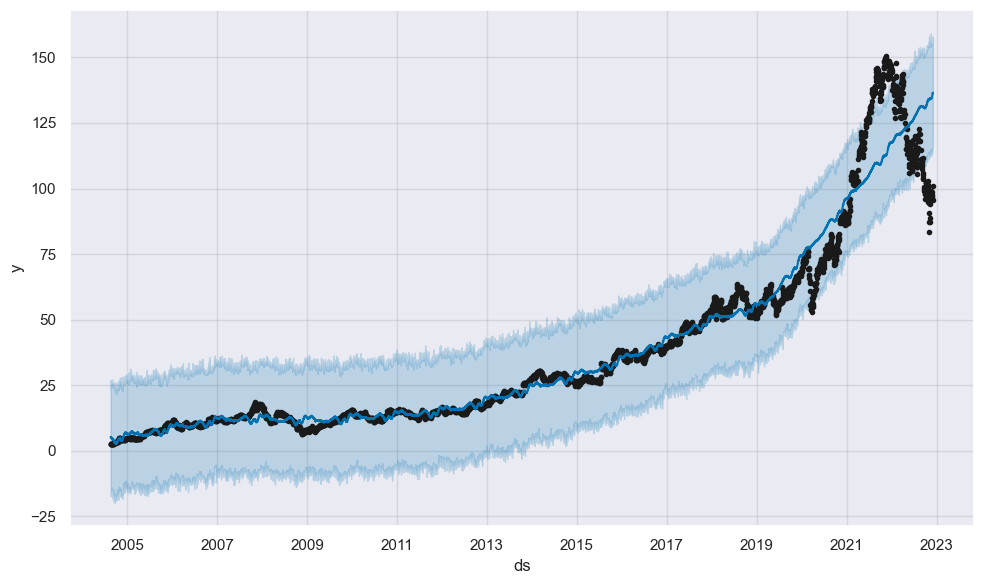

In [16]:
# Visualize the forecast
model.plot(forecast); # Add semi-colon to remove the duplicated chart

In [17]:
# Merge actual and predicted values
performance = pd.merge(data, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [19]:
# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

The MAE for the model is 4.312881740949105


In [20]:
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAPE for the model is 0.11495157810704172


In [21]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

In [22]:
# Check the number of anomalies
performance['anomaly'].value_counts()

0    4369
1     237
Name: anomaly, dtype: int64

In [23]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
3917,2020-03-12 04:00:00,55.745499,77.582974,57.476083,98.271248,1
3919,2020-03-16 04:00:00,54.216499,77.559474,54.992480,98.862360,1
3920,2020-03-17 04:00:00,55.990002,77.837910,57.309203,98.005713,1
3921,2020-03-18 04:00:00,54.840000,77.736706,58.052246,99.002141,1
3922,2020-03-19 04:00:00,55.764500,78.128819,56.043818,97.263698,1
...,...,...,...,...,...,...
4601,2022-11-28 05:00:00,96.250000,135.711388,115.264087,156.027683,1
4602,2022-11-29 05:00:00,95.440002,135.975487,115.403379,154.323586,1
4603,2022-11-30 05:00:00,101.449997,136.040674,115.333627,157.726997,1
4604,2022-12-01 05:00:00,101.279999,136.589306,115.787869,156.081118,1


<AxesSubplot:xlabel='ds', ylabel='y'>

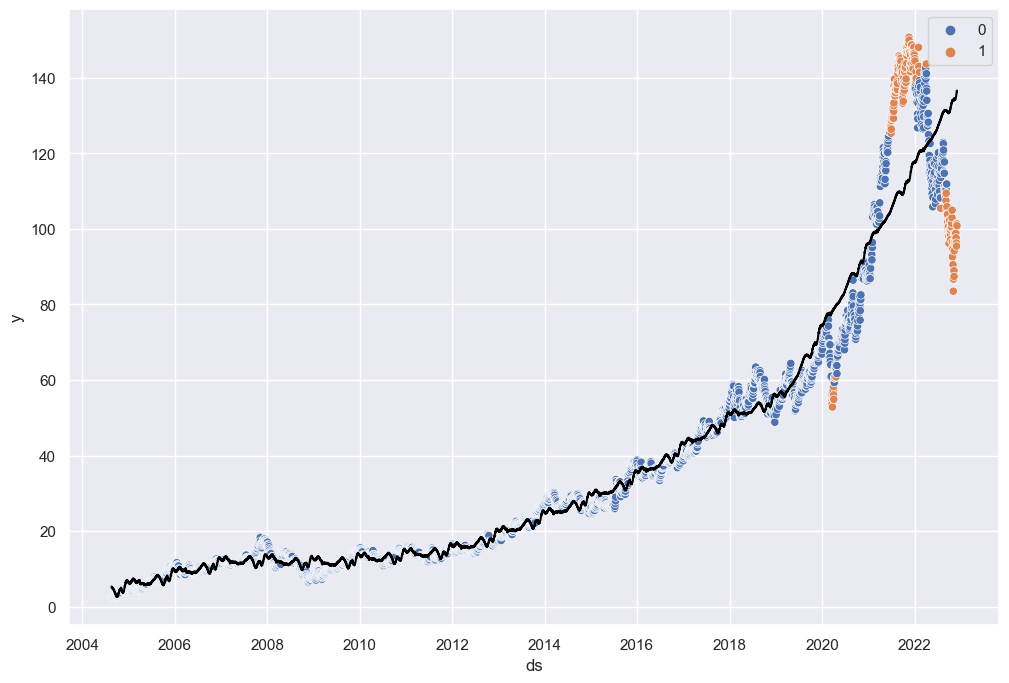

In [24]:
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')